<a href="https://colab.research.google.com/github/asarria48/Nuclear-physics/blob/main/INSim2Alver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parte I: distribución exponencial

In [2]:
import numpy as np
import matplotlib.pyplot as plt

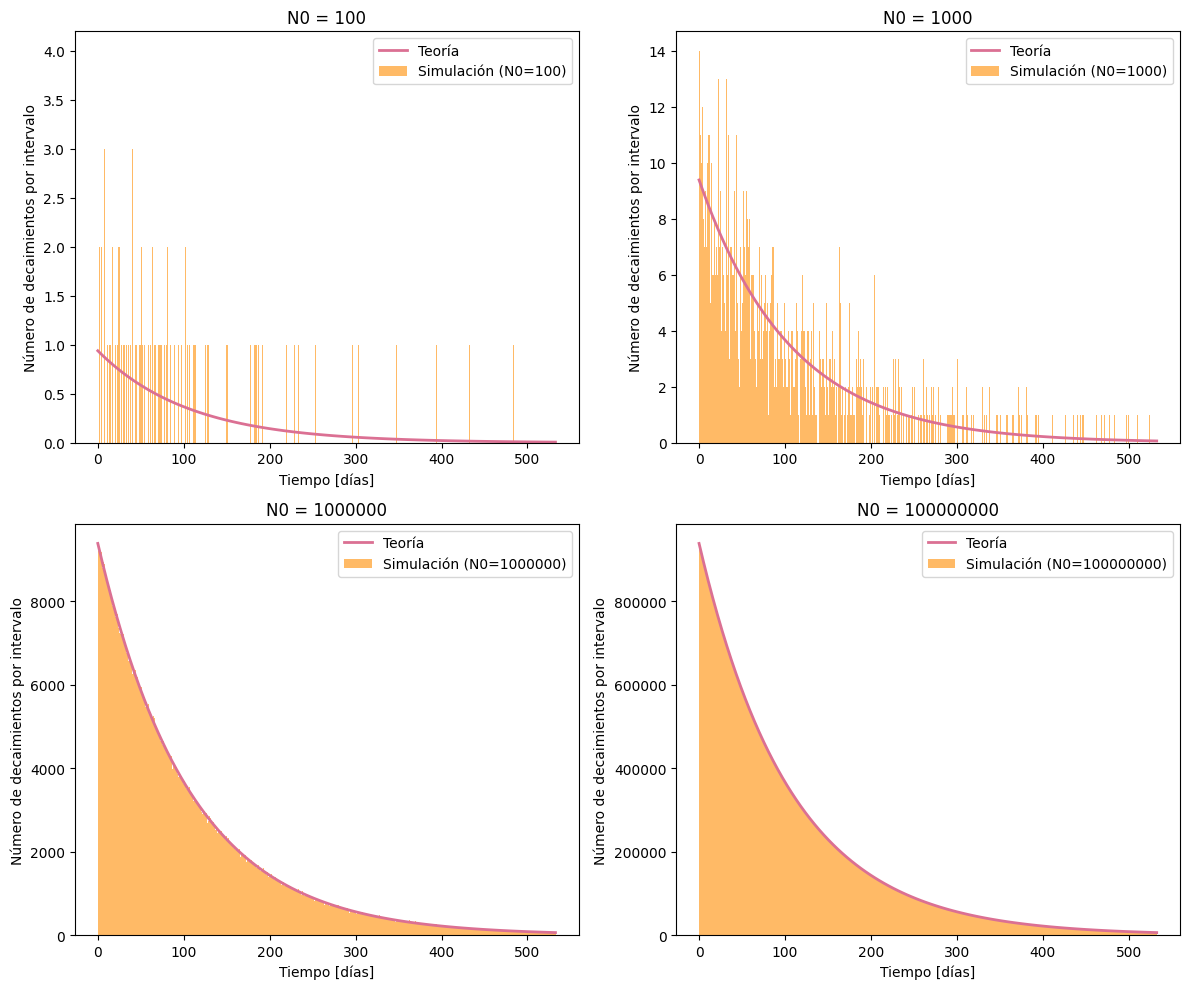

In [10]:
T_med = 73.826            # Semivida [días]
Gamma = np.log(2)/T_med   # Probabilidad de decaimiento por unidad de días [1/días]
tau = 1/Gamma             # Vida media [días]

dt = 1                    # La toma de datos ocurre en este tiempo, dt debe ser suficientemente menor para que se tome una buena cantidad de datos. Un día comparado con el tau es bueno.
t_f = 5*tau               # después de unas pocas vidas medias (tau), casi todos los núcleos han decaído. En este sentido, se puede considerar alrededor de 4 veces tau.


N_values = [10**2, 10**3, 10**6, 10**8]               # para el punto 7, distinta cantidad de núcleo


fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, N0 in enumerate(N_values):
    u = np.random.rand(N0)                             # Monte Carlo para números aleatorios
    t_decay = -np.log(1-u)/Gamma                       # inversa de la acumulativa para pbtener los tiempos de decaimiento


    bins = np.arange(0, t_f+dt, dt)                    # abarca hasta el último bin
    counts, edges = np.histogram(t_decay, bins=bins)   # cuento cuántos núcleos decayeron en cada intervalo
    centers = 0.5 * (edges[1:] + edges[:-1])           # calcular los centros de los bins para graficar


    t_theory = np.linspace(0, t_f, 100)
    pdf_theory = N0*Gamma * np.exp(-Gamma * t_theory)  # densidad de probabilidad teórica escalada a los datos



    ax = axes[idx]
    ax.bar(centers, counts, width=dt,color='darkorange', alpha=0.6, label="Simulación (N0={})".format(N0))   # se usa dt como ancho del bin
    ax.plot(t_theory, pdf_theory, color='palevioletred', lw=2, label="Teoría")
    ax.set_xlabel("Tiempo [días]")
    ax.set_ylabel("Número de decaimientos por intervalo")
    ax.set_title(f"N0 = {N0}")
    ax.legend()

plt.tight_layout()
plt.show()

#Parte II: distribución binomial núcleo por núcleo